# Final Project Submission

Please fill out:
* Student name: **William Dougherty**
* Student pace: **self paced**
* Scheduled project review date/time: **TBD**
* Instructor name: **Jeff Herman**
* Blog post URL: **TBD**


### Initial exploration
"What type of films are currently doing the best at the box office?

Translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating."

In [3]:
# Importing needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing data files

# Box Office Mojo
bom = pd.DataFrame(pd.read_csv('zippedData/bom.movie_gross.csv.gz'))

# IMDB
imbd_name_basics = pd.DataFrame(pd.read_csv('zippedData/imdb.name.basics.csv.gz'))
imdb_title_akas = pd.DataFrame(pd.read_csv('zippedData/imdb.title.akas.csv.gz'))
imdb_title_basics = pd.DataFrame(pd.read_csv('zippedData/imdb.title.basics.csv.gz'))
imdb_title_crew = pd.DataFrame(pd.read_csv('zippedData/imdb.title.crew.csv.gz'))
imdb_title_principals = pd.DataFrame(pd.read_csv('zippedData/imdb.title.principals.csv.gz'))
imdb_title_ratings = pd.DataFrame(pd.read_csv('zippedData/imdb.title.ratings.csv.gz'))

# Rotten Tomatoes
rt_info = pd.DataFrame(pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t'))
# Because of encoding issues, rt_reviews needed a different specified encoding to read/import
rt_reviews = pd.DataFrame(pd.read_csv('zippedData/rt.reviews.tsv.gz',\
                                      sep='\t', encoding = "ISO-8859-1"))

# The Movie DB
tmdb = pd.DataFrame(pd.read_csv('zippedData/tmdb.movies.csv.gz'))
# The-Numbers.com
tn_budgets = pd.DataFrame(pd.read_csv('zippedData/tn.movie_budgets.csv.gz'))

# Gathering all df's into a dictionary, for iteration purposes
all_df = {'bom':bom, 'imbd_name_basics': imbd_name_basics, 'imdb_title_akas': imdb_title_akas,\
          'imdb_title_basics': imdb_title_basics, 'imdb_title_crew': imdb_title_crew,\
          'imdb_title_principals': imdb_title_principals, 'imdb_title_ratings': imdb_title_ratings,
          'rt_info': rt_info, 'rt_reviews': rt_reviews, 'tmdb': tmdb, 'tn_budgets': tn_budgets}

In [5]:
# Display basic info, head()'s of all df's
for df in all_df.keys():
    print(f'DataFrame: {df}\n')
    display(all_df[df].info())
    display(all_df[df].describe())
    display(all_df[df].head())

DataFrame: bom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


DataFrame: imbd_name_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


None

,birth_year,death_year
count,82736.000000,6783.000000
mean,1967.043826,2000.523367
std,22.122190,43.951530
min,1.000000,17.000000
25%,1957.000000,2001.000000
50%,1971.000000,2013.000000
75%,1981.000000,2016.000000
max,2014.000000,2019.000000


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


DataFrame: imdb_title_akas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


None

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


DataFrame: imdb_title_basics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


DataFrame: imdb_title_crew

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


None

,tconst,directors,writers
count,146144,140417,110261
unique,146144,98525,91920
top,tt3700390,nm3266654,nm0000636
freq,1,62,80


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


DataFrame: imdb_title_principals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


None

,ordering
count,1.028186e+06
mean,4.739847e+00
std,2.747446e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,7.000000e+00
max,1.000000e+01


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


DataFrame: imdb_title_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


DataFrame: rt_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


DataFrame: rt_reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


None

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


DataFrame: tmdb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


DataFrame: tn_budgets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# What movies made the most money, as a function of dollar made per dollar spent?
# First, turning the budget/gross entries into floats, in millions:

df1 = all_df['tn_budgets']
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    df1[col] = df1[col].replace('[\$\,\.]',"",regex=True).astype('float')
    df1[col] = round(df1[col] / 1000000, 3)
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425.000,760.508,2776.345
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.600,241.064,1045.664
2,3,"Jun 7, 2019",Dark Phoenix,350.000,42.762,149.762
3,4,"May 1, 2015",Avengers: Age of Ultron,330.600,459.006,1403.014
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.000,620.181,1316.722
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,0.007,0.000,0.000
5778,79,"Apr 2, 1999",Following,0.006,0.048,0.240
5779,80,"Jul 13, 2005",Return to the Land of Wonders,0.005,0.001,0.001
5780,81,"Sep 29, 2015",A Plague So Pleasant,0.001,0.000,0.000


In [8]:
# And creating a new column, the return on production dollars 
# ((domestic, worldwide)_gross divided by production_budget)

# Top 20 domestic returns:

df1['dom_return'] = round(df1['domestic_gross'] / df1['production_budget'], 1)
df1['ww_return'] = round(df1['worldwide_gross'] / df1['production_budget'], 1)
df1[df1['domestic_gross'] > 0].sort_values(by='dom_return', ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return
5745,46,"Jun 30, 1972",Deep Throat,0.025,45.000,45.000,1800.0,1800.0
5773,74,"Feb 26, 1993",El Mariachi,0.007,2.041,2.042,291.6,291.7
5492,93,"Sep 25, 2009",Paranormal Activity,0.450,107.919,194.183,239.8,431.5
5406,7,"Jul 14, 1999",The Blair Witch Project,0.600,140.539,248.300,234.2,413.8
5679,80,"Jul 10, 2015",The Gallows,0.100,22.764,41.656,227.6,416.6
5715,16,"Aug 9, 1995",The Brothers McMullen,0.050,10.427,10.427,208.5,208.5
5665,66,"Oct 18, 1974",The Texas Chainsaw Massacre,0.140,26.572,26.572,189.8,189.8
5781,82,"Aug 5, 2005",My Date With Drew,0.001,0.181,0.181,181.0,181.0
5709,10,"May 7, 2004",Super Size Me,0.065,11.529,22.234,177.4,342.1
5372,73,"Aug 11, 1973",American Graffiti,0.777,115.000,140.000,148.0,180.2


In [9]:
# Top 20 worldwide returns:

df1.sort_values(by='ww_return', ascending=False).head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return
5745,46,"Jun 30, 1972",Deep Throat,0.025,45.000,45.000,1800.0,1800.0
5613,14,"Mar 21, 1980",Mad Max,0.200,8.750,99.750,43.8,498.8
5492,93,"Sep 25, 2009",Paranormal Activity,0.450,107.919,194.183,239.8,431.5
5679,80,"Jul 10, 2015",The Gallows,0.100,22.764,41.656,227.6,416.6
5406,7,"Jul 14, 1999",The Blair Witch Project,0.600,140.539,248.300,234.2,413.8
5709,10,"May 7, 2004",Super Size Me,0.065,11.529,22.234,177.4,342.1
5346,47,"Aug 13, 1942",Bambi,0.858,102.797,268.000,119.8,312.4
5773,74,"Feb 26, 1993",El Mariachi,0.007,2.041,2.042,291.6,291.7
5676,77,"Oct 1, 1968",Night of the Living Dead,0.114,12.087,30.087,106.0,263.9
5210,11,"Nov 21, 1976",Rocky,1.000,117.235,225.000,117.2,225.0


In [14]:
# Now, let's convert the dates to a useable format:
df1['release_date'] = pd.to_datetime(df1['release_date'])

In [19]:
# And let's see the net revenue made (domestic and worldwide)
df1['dom_net'] = df1['domestic_gross'] - df1['production_budget']
df1['ww_net'] = df1['worldwide_gross'] - df1['production_budget']

In [32]:
# Here are the top 30 films, by worldwide net revenue (2015 and later):
df1.describe()

,id,production_budget,domestic_gross,worldwide_gross,dom_return,ww_return,dom_net,ww_net
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,31.587757,41.873327,91.487460,2.985662,4.802248,10.285570,59.899703
std,28.821076,41.812077,68.240598,174.719971,26.105061,29.546786,49.921364,146.088883
min,1.000000,0.001000,0.000000,0.000000,0.000000,0.000000,-307.238000,-200.238000
25%,25.000000,5.000000,1.429250,4.125250,0.200000,0.500000,-9.132500,-2.188750
50%,50.000000,17.000000,17.226000,27.984000,0.900000,1.700000,-0.349000,8.550500
75%,75.000000,40.000000,52.349000,97.646250,2.100000,3.800000,17.781250,60.968750
max,100.000000,425.000000,936.662000,2776.345000,1800.000000,1800.000000,630.662000,2351.345000


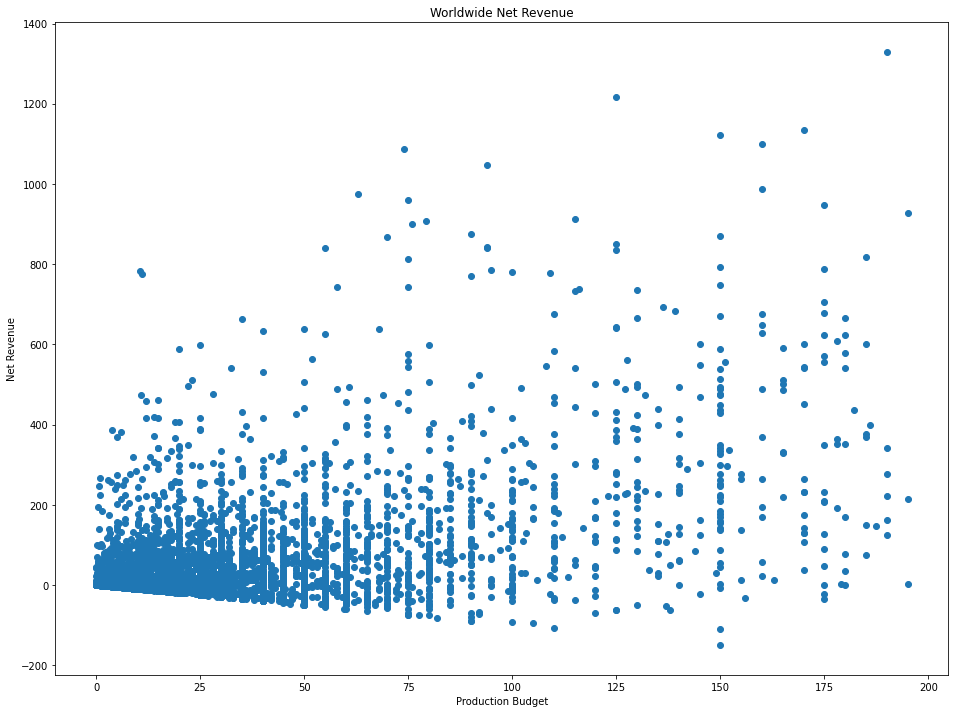

In [59]:
ax, fig = plt.subplots(figsize=(16,12))
df2 = df1[df1['production_budget'] < 200]
plt.scatter(df2['production_budget'], df2['ww_net'])
plt.title('Worldwide Net Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Net Revenue');